# A Crash Course in Pandas (with some Matplotlib for good measure)

Based on a tutorial by [Allison Parrish](http://www.decontextualize.com/).

[Pandas](http://pandas.pydata.org/) is a Python library for data analysis. It provides much of the functionality of R's built-in data frames, and plays especially well with Jupyter Notebook, taking advantage of the notebook format to display data in easy-to-read ways. While we could continue to use data types like lists and dictionaries, Pandas provides additional data types and related functions that are (or will become) hopefully easier for you to manipulate, and also have the potential to run faster than their equivalents written with more familiar Python data types.

The purpose of this notebook is to give you a taste for how Pandas works in the event that you want to use it in your final project. By the end of the notebook, you'll be able to use Pandas to load some data from a CSV file into a Pandas data frame and use Pandas' data visualization functions to draw a handful of simple graphs. 

## Importing Pandas

To fully take advantage of the capabilities of Pandas, you need to import not just Pandas but a handful of other libraries:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_rows', 25)
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)

The first line is what's known as an [IPython magic](ipython.readthedocs.io/en/stable/interactive/magics.html); it tells the notebook server to display plots inline. 

The next three lines import Pandas (using the `as` clause to shorten its name to `pd`) and two other libraries we've used a few times before, `numpy` and `matplotlib`, in case we need them. 

The final two lines set some options to make our plots look prettier.

Whenever you start a new notebook and want to use Pandas, it's a good idea to just copy and paste the code from the  cell above and make it the first cell in your own notebook.

No now let's look at a couple of Pandas data types.

## The Series

The `Series` data type in Pandas is like a Python list, in that it stores a sequence of values. But it has a few extra goodies that make it appealing for data analysis.

One way to create a `Series` is to just pass a Python list to `pd.Series()`:

In [2]:
example_list = [5, 5, 5, 10, 10, 12, 15, 15, 23, 27, 30]

s = pd.Series(example_list)

In [3]:
s

0      5
1      5
2      5
3     10
4     10
5     12
6     15
7     15
8     23
9     27
10    30
dtype: int64

Unlike regular Python lists, you can operate on a Series using arithmetic operations. So, for example, you can multiply an entire Series by 0.5:

In [5]:
s * 0.5

0      2.5
1      2.5
2      2.5
3      5.0
4      5.0
5      6.0
6      7.5
7      7.5
8     11.5
9     13.5
10    15.0
dtype: float64

... or create a Series with 100 added to each entry from the original Series:

In [4]:
s + 100

0     105
1     105
2     105
3     110
4     110
5     112
6     115
7     115
8     123
9     127
10    130
dtype: int64

Series support a variety of statistical operations through methods. To get the smallest value in a Series:

In [7]:
s.min()

5

The greatest value:

In [8]:
s.max()

30

The arithmetic mean:

In [9]:
s.mean()

14.272727272727273

Various other operations are supported as well:

In [10]:
s.median()

12.0

In [11]:
s.mode()

0    5
dtype: int64

In [12]:
s.std() # standard deviation

8.866689450870703

In [13]:
s.quantile(0.75) # 75th percentile

19.0

The `.describe()` method gives you some quick insight on the statistical properties of the series as a whole:

In [14]:
s.describe()

count    11.000000
mean     14.272727
std       8.866689
min       5.000000
25%       7.500000
50%      12.000000
75%      19.000000
max      30.000000
dtype: float64

### Plotting Series

Every Series object has a `.plot()` method that will display a plot of the data contained in the series. Very easy!

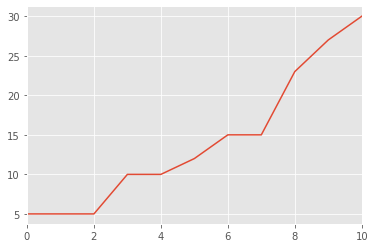

In [15]:
s.plot()

By default, you get a line plot, but the `.plot()` method can take a named parameter `kind` that allows you to specify different types of plots. [There's a full list here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html#pandas.Series.plot), but just to demonstrate, here's a bar graph from our test series:

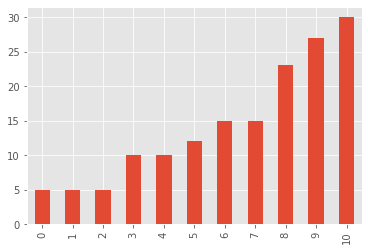

In [16]:
s.plot(kind="bar")

A horizontal bar chart:

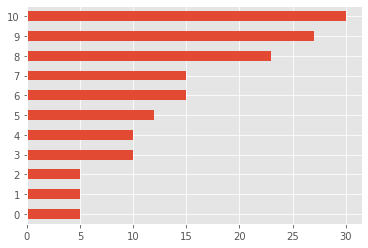

In [17]:
s.plot(kind="barh")

A pie chart:

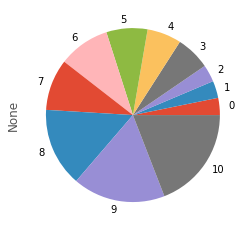

In [18]:
s.plot(kind="pie")

### Series indices don't have to be integers

The default behavior of a Series is to use integers as indices: if you initialize a Series with just a list, then the indices start at 0 and go up to the length of the list (minus 1). But the indices of a Series can be essentially any data type. You can specify the values and indices in a Series by passing them as a dictionary, or as two lists (values first, indices second):

In [20]:
example_dict = {
    "Mercury": 0,
    "Venus" : 0,
    "Earth" : 1,
    "Mars" : 2,
    "Jupiter" : 69,
    "Saturn" : 62,
    "Uranus" : 27,
    "Neptune" : 14
}

ex_list_indices = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
ex_list_values = [0, 0, 1, 2, 69, 62, 27, 14]

In [21]:
# here it is with a dict
planet_moons = pd.Series(example_dict)

planet_moons

Mercury     0
Venus       0
Earth       1
Mars        2
Jupiter    69
Saturn     62
Uranus     27
Neptune    14
dtype: int64

In [23]:
# and here with the two lists -- note order is values, indices
planet_moons = pd.Series(ex_list_values, ex_list_indices) 

planet_moons

Mercury     0
Venus       0
Earth       1
Mars        2
Jupiter    69
Saturn     62
Uranus     27
Neptune    14
dtype: int64

All the various statistical operations still work, e.g.:

In [24]:
planet_moons.mean()

21.875

Plots work as well:

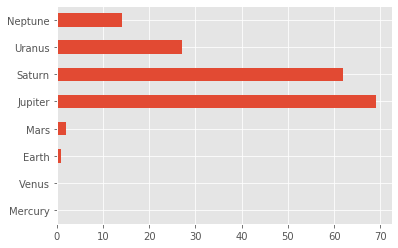

In [25]:
planet_moons.plot(kind="barh")

So you can start to see how this might be helpful for easily plotting combinations of words (as indices) and integers (or any sort of associated numerical value). 

But even if the indices are integers and not words, they don't have to be *sequential* integers. A good example of this is what happens when you use the `.value_counts()` method, which returns a new Series with totals for each unique value (like a Counter object):

In [26]:
# first, remember our example series, s:

s

0      5
1      5
2      5
3     10
4     10
5     12
6     15
7     15
8     23
9     27
10    30
dtype: int64

In [27]:
s_counts = s.value_counts()
s_counts

5     3
15    2
10    2
30    1
12    1
27    1
23    1
dtype: int64

See how this has flipped around the indices and the values? The `value.counts()` method provids a new series with each value as an index, and its count as its new value. 

We'll get back to why this is important in a second...

### Series indexing

To get a particular value from a Series, you can use the square bracket syntax familiar to you from Python lists and dictionaries:

In [28]:
s[0]

5

In [29]:
s[4]

10

Using the slice operator gives you a new Series representing the corresponding slice:

In [30]:
s[1:4]

1     5
2     5
3    10
dtype: int64

This syntax works for Series with non-integer indices as well:

In [31]:
planet_moons["Neptune"]

14

Somewhat weirdly, you can use *slice* syntax with non-integer indices. This is something you can do with a Pandas Series that you *definitely* can't do with a regular list or dictionary:

In [32]:
planet_moons["Mercury":"Jupiter"]

Mercury     0
Venus       0
Earth       1
Mars        2
Jupiter    69
dtype: int64

Even with Series with non-integer indices will allow you to use numerical indices, to refer to the item in the series corresponding to that entry in numerical order:

In [33]:
planet_moons[5] # item #5

62

In [34]:
planet_moons[:4] # the first 4 items

Mercury    0
Venus      0
Earth      1
Mars       2
dtype: int64

### Location versus index

Where this gets *even weirder* is with Series that have non-consecutive integer indices. Recall the result of `.value_counts()` for our original Series `s`:

In [232]:
s_counts

5     3
15    2
10    2
30    1
12    1
27    1
23    1
dtype: int64

It's not clear what the expression `s_counts[5]` should evaluate to: the item at numerical index `5` in the Series, or the value for the index `5`. Let's see what happens:

In [35]:
s_counts[5]

3

It looks like the Series gives us the value for the index `5` (i.e., not the value for the index `27`, which is in the fifth numerical index position). Weird! To avoid this ambiguity, you can use the `.iloc` attribute, which always uses numerical position:

In [36]:
s_counts.iloc[5]

1

In [38]:
planet_moons.iloc[5]

62

### Selecting from a Series

Another way to get portions of a Series is to "select" items from it. Series values support an unusual syntax where you can put a *list* inside of the square bracket indexing syntax, and in that list you can specify which fields in particular you want. So for example:

In [39]:
planet_moons[ ["Jupiter", "Saturn"] ]

Jupiter    69
Saturn     62
dtype: int64

Very weird, right? But it's also quite handy in certain circumstances. You can also pass a list of Boolean values (i.e., `True` or `False`), in which case you'll receive a new Series that only has values for the items in the original series that correspond with a `True` value in the list. That's confusing to explain, but easy to understand if you see it in action:

In [40]:
planet_moons

Mercury     0
Venus       0
Earth       1
Mars        2
Jupiter    69
Saturn     62
Uranus     27
Neptune    14
dtype: int64

In [41]:
planet_moons[ [False, False, False, True, False, False, False, True] ]

Mars        2
Neptune    14
dtype: int64

This feature is of limited utility on its own, but there's another bit of functionality that the Series value gives you that works alongside it. The same way that you can multiply a Series, or add a constant to a Series, you can also use a relational operator on a Series. When you do so, you get back a Series that has `True` for every item that passed the test and `False` for every item that failed. For example:

In [42]:
planet_moons < 20

Mercury     True
Venus       True
Earth       True
Mars        True
Jupiter    False
Saturn     False
Uranus     False
Neptune     True
dtype: bool

If you combine these two features, you can write an expression that returns a Series with only those items that meet particular criteria. For example, the following expression gives us only those planets that have fewer than twenty known moons:

In [43]:
planet_moons[planet_moons < 20]

Mercury     0
Venus       0
Earth       1
Mars        2
Neptune    14
dtype: int64

## The DataFrame

I wanted to discuss the Series data type because you'll see it again and again when you're working with Pandas, and it's important to understand what it is and what it can do. But for the most part when you're working with Pandas, you'll be working with another data type called the `DataFrame`. A `DataFrame` is sort of like a spreadsheet, consisting of rows and columns. As with series, the rows and columns can have labels (i.e., the items have names like they do in the `planet_moons` Series above) and can also be indexed purely by position.

You can create a `DataFrame` by passing in a dictionary, where the keys of the dictionary are the column labels and the values are lists of individual values for each row. Here I'm creating a very simple DataFrame for the [longest rivers in the world](https://en.wikipedia.org/wiki/List_of_rivers_by_length), including their names, their length (in kilometers), their drainage areas (in square kilometers) and their average discharge (in cubic meters per second):

In [44]:
river_data = {
    "Name": ["Amazon", "Nile", "Yangtze", "Mississippi"],
    "Length": [6992, 6835, 6300, 6275],
    "Drainage area": [7050000, 3254555, 1800000, 2980000],
    "Discharge": [209000, 2800, 31900, 16200]
}
river_df = pd.DataFrame(river_data)

Evaluating the DataFrame in Jupyter Notebook displays the data in a nice, clean HTML table:

In [46]:
river_df

,Name,Length,Drainage area,Discharge
0,Amazon,6992,7050000,209000
1,Nile,6835,3254555,2800
2,Yangtze,6300,1800000,31900
3,Mississippi,6275,2980000,16200


You'll notice that the *order* of the indices is (probably) wrong. That's because when you initialize a DataFrame with a dictionary, Pandas sorts the keys alphabetically by default. If you want to specify a different order, use the `columns` named parameter, with a list of the column labels in the order you want:

In [47]:
river_df = pd.DataFrame(river_data, columns=["Name", "Length", "Drainage area", "Discharge"])

In [48]:
river_df

,Name,Length,Drainage area,Discharge
0,Amazon,6992,7050000,209000
1,Nile,6835,3254555,2800
2,Yangtze,6300,1800000,31900
3,Mississippi,6275,2980000,16200


Just as with a Series, you can plot the data in a DataFrame right away using the `.plot()` method. (The `x` named parameter sets the column to use to label each bar; if you do this call without the `x` the bars will be labelled by their row number, which isn't terribly helpful.) By default, all columns are plotted, which isn't super useful, but it *is* easy:

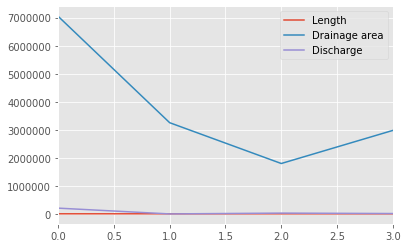

In [49]:
river_df.plot()

That graph doesn't make any sense, and it doesn't make sense for several different reasons:

* The values that we're plotting don't share a common *scale*, so the Y-axis doesn't really tell us anything useful about the Length and Discharge fields, whose scale is dwarfed by the Drainage area field.
* The X-axis ranges from zero to three. This would make sense if we were working with a time series (i.e., a data set with a number of data points recording the same phenomenon over time), but the data we're working with in this example has distinct values that aren't "ordered" in a meaningful sense.

To fix this, we can pass a couple of parameters to the `.plot()` method. For example:

* You can specify individual columns to plot with the `y` named parameter
* You can specify a label to use on the X-axis with the `x` named parameter

Combining these, we can get a nice bar chart of our rivers' discharges, showing that the amount of water but out by the Amazon is truly tremendous:

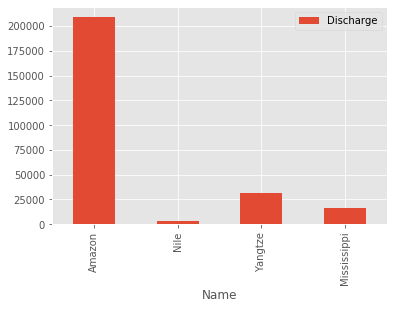

In [50]:
river_df.plot(kind="bar", x="Name", y="Discharge")

### Indexing the DataFrame

When you're working with DataFrames, sometimes you want to *isolate* an individual row or column as a series. In other cases, you want to *construct a new DataFrame* based on a subset of rows or columns from the original DataFrame. Or, you might just want to get a single value at the intersection of a row and column. In other words, there are three different operations, which we can think about in terms of the types involved:

* `DataFrame` → `Series` (i.e., get a column or row)
* `DataFrame` → `DataFrame` (i.e., filter a DataFrame based on rows or columns that meet particular criteria)
* `DataFrame` → single value (i.e., get a number, string, etc. from a particular row/column intersection)

We'll talk about these one by one below.

#### Getting rows and columns as Series objects

Getting a Series from a column of a DataFrame is easy: just use the label of the column in square brackets after the DataFrame:

In [51]:
river_df["Length"]

0    6992
1    6835
2    6300
3    6275
Name: Length, dtype: int64

With the resulting series, you can do any of the statistical operations discussed earlier for Series:

In [52]:
river_df["Length"].max()

6992

You can even plot the series, though it's not terribly useful because we're missing the names of the rivers:

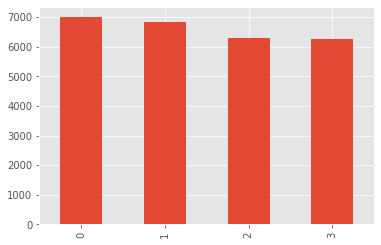

In [53]:
river_df["Length"].plot(kind="bar")

Getting an individual row as a series is also possible. Just use the `.iloc[]` attribute with the numerical index of the row inside the brackets:

In [54]:
river_df.iloc[2]

Name             Yangtze
Length              6300
Drainage area    1800000
Discharge          31900
Name: 2, dtype: object

#### Making new DataFrames from existing DataFrames

You can use the indexing syntax to give you a *new* DataFrame that includes only particular columns and rows from the original DataFrame. If you wanted a new DataFrame that only includes particular columns, then pass a *list* of the columns you want inside the square bracket indexing syntax:

In [55]:
name_length_df = river_df[["Name", "Length"]]

In [56]:
type(name_length_df)

pandas.core.frame.DataFrame

In [474]:
name_length_df

,Name,Length
0,Amazon,6992
1,Nile,6835
2,Yangtze,6300
3,Mississippi,6275


Weirdly, you can use this syntax to get a new DataFrame with just a single column, which is *different* from a Series object:

In [57]:
river_df[["Name"]]

,Name
0,Amazon
1,Nile
2,Yangtze
3,Mississippi


In [58]:
river_df["Name"]

0         Amazon
1           Nile
2        Yangtze
3    Mississippi
Name: Name, dtype: object

To get a new DataFrame with just a subset of rows from the original DataFrame, you can use slice syntax with either row labels or numbers. So to get rows 2 through 4:

In [65]:
a_few_rivers_df = river_df[1:4] # remember: final number not inclusive 

In [63]:
type(a_few_rivers_df)

pandas.core.frame.DataFrame

In [64]:
a_few_rivers_df

,Name,Length,Drainage area,Discharge
1,Nile,6835,3254555,2800
2,Yangtze,6300,1800000,31900
3,Mississippi,6275,2980000,16200


#### Selecting rows with Boolean operators

Just as with Series values, you can use a list of Boolean (i.e., `True` or `False`) values to select particular rows from a DataFrame:

In [66]:
river_df[ [True, False, False, True] ]

,Name,Length,Drainage area,Discharge
0,Amazon,6992,7050000,209000
3,Mississippi,6275,2980000,16200


You can get a list of Boolean values for any column of a DataFrame (as a Series) using the the square brackets to get the column and then a comparison operator:

In [67]:
river_df["Discharge"] > 30000

0     True
1    False
2     True
3    False
Name: Discharge, dtype: bool

Combine the two, and you can write an expression that creates a new DataFrame with only the rows from the original DataFrame that match a particular criterion:

In [68]:
river_df[river_df["Discharge"] > 30000]

,Name,Length,Drainage area,Discharge
0,Amazon,6992,7050000,209000
2,Yangtze,6300,1800000,31900
